In [1]:
import numpy as np
import pickle
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
sample=pd.read_csv('./sample.csv')
sample=sample.values[:,1:]
sample

array([[0, 1, 0, 1, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 2, 1, 2, 2, 0],
       [0, 1, 1, 0, 1, 1, 2, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 2, 1, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 2, 0, 2, 1, 0],
       [1, 1, 0, 0, 0, 2, 1, 2, 2, 1],
       [0, 0, 0, 0, 0, 1, 2, 1, 0, 0]], dtype=int64)

In [3]:
sample[:,:-1]

array([[0, 1, 0, 1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 2, 1, 2, 2],
       [0, 1, 1, 0, 1, 1, 2, 0, 0],
       [0, 0, 0, 1, 1, 0, 2, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2, 0, 2, 1],
       [1, 1, 0, 0, 0, 2, 1, 2, 2],
       [0, 0, 0, 0, 0, 1, 2, 1, 0]], dtype=int64)

In [4]:
from RandomModel import *

In [2]:
import numpy as np
import pickle
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
dump_path1='./data/titanic_train.pkl'
titanic_df=pickle.load(open(dump_path1,'rb'))   
titanic_df.head()

,Pclass,SibSp,Parch,Family,HasGrandParents,HasCbInfo,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,AgeGrp_2,AgeGrp_3,AgeGrp_4,AgeGrp_5,FareGrp_1,FareGrp_2,FareGrp_3,FareGrp_4,FareGrp_5,Survived
0,3,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1,1,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,3,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [6]:
dump_path2='./data/nyhouse_train.pkl'
house_df=pickle.load(open(dump_path2,'rb'))   
house_df.head()

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,5.831328,19.212182,2,7,5,2003,2003,8.059126,4,3,...,0,0,1,0,0,0,0,1,0,12.247699
1,6.221214,19.712205,3,6,8,1976,1976,0.000000,3,3,...,0,0,1,0,0,0,0,1,0,12.109016
2,5.914940,20.347241,2,7,5,2001,2002,7.646538,4,3,...,0,0,1,0,0,0,0,1,0,12.317171
3,5.684507,19.691553,3,7,5,1915,1970,0.000000,3,3,...,0,0,1,1,0,0,0,0,0,11.849405
4,6.314735,21.325160,4,8,5,2000,2000,9.391827,4,3,...,0,0,1,0,0,0,0,1,0,12.429220


In [7]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, Ridge, LinearRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score

In [8]:
# Titanic
ttrain = titanic_df[titanic_df.columns[:-1]]
tlabel = titanic_df[titanic_df.columns[-1]]
# NY housing
htrain = house_df[house_df.columns[:-1]]
hlabel = house_df[house_df.columns[-1]]

In [9]:
# Titanic
ttrain = ttrain.as_matrix().astype(float)
tlabel = tlabel.as_matrix().astype(float)
X_ttrain,X_ttest,y_ttrain,y_ttest = train_test_split(ttrain,tlabel,test_size=0.25,random_state=0)
# NY housing
htrain = htrain.as_matrix().astype(float)
hlabel = hlabel.as_matrix().astype(float)
X_htrain,X_htest,y_htrain,y_htest = train_test_split(htrain,hlabel,test_size=0.25,random_state=0)

In [10]:
basic_model_search_switch = False # whether run gridsearchcv for basic models

In [11]:
def gridsearch_result_titanic(model,params):
    model_gscv = GridSearchCV(model,params,cv=5)
    model_gscv.fit(X_ttrain,y_ttrain)
    y_pred = model_gscv.predict(X_ttest)
    score = accuracy_score(y_ttest,y_pred)
    return model_gscv.best_params_,score

def gridsearch_result_house(model,params):
    model_gscv = GridSearchCV(model,params,cv=5)
    model_gscv.fit(X_htrain,y_htrain)
    y_pred = model_gscv.predict(X_htest)
    score = accuracy_score(y_htest,y_pred)
    return model_gscv.best_params_,score

'''
def acc_titanic(model):
    model.fit(X_ttrain,y_ttrain)
    y_pred = model.predict(X_ttest)
    return accuracy_score(y_ttest,y_pred)
    
'''


'\ndef acc_titanic(model):\n    model.fit(X_ttrain,y_ttrain)\n    y_pred = model.predict(X_ttest)\n    return accuracy_score(y_ttest,y_pred)\n    \n'

In [12]:
#Logistic Regression
if basic_model_search_switch:
    LR_params = {'C':[0.1,1,10,1e2,1e3,1e5],'solver':['liblinear','sag']}
    LR = LogisticRegression(random_state=1)
    lr_best_param,lr_score = gridsearch_result_titanic(LR,LR_params)

    print('LR training score: {}'.format(lr_score))
    print('With the best parameters:')
    print(lr_best_param)

In [13]:
#KNN
if basic_model_search_switch:
    knn_params = {'n_neighbors':[5,6,7,8,9,10],'weights':['uniform','distance'],'p':[1,2]}
    KNN = KNeighborsClassifier(n_jobs=-1)
    knn_best_param,knn_score = gridsearch_result_titanic(KNN,knn_params)

    print('KNN training score: {}'.format(knn_score))
    print('With the best parameters:')
    print(knn_best_param)

In [14]:
#SVC
if basic_model_search_switch:
    svc_params = {'C':[0.1,1,10,1e2],'kernel':['linear','poly'],'degree':[2,3]}
    svC = SVC(random_state=1)
    svc_best_param,train_score = gridsearch_result_titanic(svC,svc_params)

    print('SVC training score: {}'.format(train_score))
    print('With the best parameters:')
    print(svc_best_param)

In [15]:
LR = LogisticRegression(solver='sag',C=0.1,random_state=1)
KNN = KNeighborsClassifier(n_neighbors=10, p=1, weights='uniform',n_jobs=-1)
svc = SVC(kernel='poly',degree=3,C=10,random_state=1)
lnr = LinearRegression()

In [16]:
if basic_model_search_switch:
    stacked_nonline = StackingAverageModels(base_models=[lnr,LR],meta_model=LR)

    score = acc_titanic(stacked_nonline)
    print("Stacking Averaged models score: {:.4f}".format(score))

In [17]:
if basic_model_search_switch:
    stacked_line = StackingAverageModels(base_models=[KNN,svc],meta_model=KNN)

    score = acc_titanic(stacked_line)
    print("Stacking Averaged models score: {:.4f}".format(score))

In [18]:
if basic_model_search_switch:
    stacked = StackingAverageModels(base_models=[stacked_nonline,stacked_line],meta_model=LR)

    score = acc_titanic(stacked)
    print("Stacking Averaged models score: {:.4f}".format(score))

In [42]:
from ensembler import StackingAverageModels, unit, acc_titanic
from sklearn.model_selection import cross_val_score

In [20]:

RF = RandomForestClassifier(n_estimators=100, criterion='gini', n_jobs=-1) # RandomForestRegressor()
layers = 0

Cols:
[12, 20, 5, 4, 17, 22, 2, 13, 6]
Cols:
[8, 20, 23, 14, 25, 19, 24, 9, 11]
Cols:
[13, 19, 8, 3, 4, 10, 5, 11, 28, 12]
Cols:
[17, 10, 11, 1, 12, 18, 13, 15, 9, 5]
Cols:
[9, 17, 6, 27, 10, 3, 7, 12, 14, 23, 26, 29]
Cols:
[16, 19, 33, 8, 21, 3, 30, 5, 15, 29, 2, 10]
Cols:
[11, 21, 5, 20, 28, 13, 18, 4, 6, 19, 2, 24, 29]
Cols:
[5, 26, 29, 4, 17, 14, 0, 24, 2, 25, 35, 33, 30]
Layers: 3
Score: 0.8233643811020087


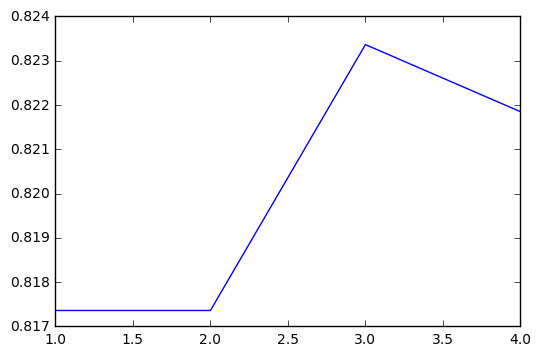

In [50]:
train = X_ttrain
test = X_ttest
label = y_ttrain
ytest = y_ttest

nonlinearmodel = KNN
linearmodel = LR
stacking = StackingAverageModels(base_models=[LR,KNN,svc],meta_model=LR)

def acc_titanic(model):
    model.fit(train, label)
    y_pred = model.predict(test)
    return accuracy_score(ytest,y_pred)

def cv_score(model):
    score = cross_val_score(model, train, label, cv=5, scoring='accuracy')
    return score.mean()

from RandomModel import *
keep_train = True
layers = 0
score_list = [0]
while keep_train:
        rmodel1 = RandomClassifier(select_num=5)
        rmodel2 = RandomClassifier(select_num=5)
        rmodel1.fit(train, label)
        rmodel2.fit(train, label)
        train_new_1 = rmodel1.predict(train)
        train_new_2 = rmodel2.predict(train)
        test_new_1 = rmodel1.predict(test)
        test_new_2 = rmodel2.predict(test)
        train, test = unit(nonlinearmodel, linearmodel, train, label, test)
        train = np.column_stack([train, train_new_1, train_new_2])
        test = np.column_stack([test, test_new_1, test_new_2])
        
        score = cv_score(KNN)

        if (score - score_list[-1] <= 0) and (abs(score - np.max(score_list)) > 1e-5):
            keep_train = False
        else:
            layers += 1
        
        score_list.append(score)

print('Layers: {}'.format(layers))
print('Score: {}'.format(np.max(score_list)))

import matplotlib.pyplot as plt
plt.plot(list(range(layers+2))[1:],score_list[1:])
plt.show()

In [1]:
from multitest import multi
multi()

[array([1, 1, 1, 1]), array([2, 3, 4, 5])]


In [2]:
from FeatureLearner.tree import RandomDecisionTreeClassifier
ld = RandomDecisionTreeClassifier()
ld.add(3,4)
ld.print_lf()

7


In [23]:
import numpy as np
for i in range(20):print(np.random.uniform(2.5,6.7));

6.198244208134952
2.9205204489734573
5.477757095812304
6.329602353603513
3.830061179266533
4.230763418844507
6.532772312206647
6.00742712612106
6.168693979509092
4.759426646737802
5.08641156480335
3.1343545995349507
5.116139994027439
3.1972193535969975
4.965568522490665
3.130214708377064
4.136356602161067
3.5399371818935217
5.891218519399159
3.711064776489558


In [34]:
value = 'gt' + str(2.35414)
float(value[2:])

2.35414

In [1]:
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
dump_path1='./data/titanic_train.pkl'
titanic_df=pickle.load(open(dump_path1,'rb'))   
titanic_df.head()

from FeatureLearner.tree import RandomDecisionTreeClassifier
X = titanic_df.values[:,:-1]
y = titanic_df.values[:,-1]
df = RandomDecisionTreeClassifier()
df.fit(X,y)
pred = df.predict(X)
accuracy_score(pred,y)

0.8754208754208754

In [6]:
l = [1,1,1,1,1,1,1,1,1,1]
k = list(np.bincount(l) / len(l))
k[0]

0.0

In [8]:
np.mean(l)

0.09523809523809523

In [2]:
df.predict_prob(X)

[[0.875, 0.125],
 [0.0, 1.0],
 [0.5, 0.49999999999999994],
 [0.0, 1.0],
 [0.9019607843137255, 0.09803921568627451],
 [0.9047619047619048, 0.09523809523809523],
 [0.8571428571428571, 0.14285714285714285],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.5, 0.5],
 [0.0, 1.0],
 [0.8625954198473282, 0.13740458015267173],
 [1.0, 0.0],
 [0.5, 0.5],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.8, 0.2],
 [0.6, 0.39999999999999997],
 [0.0, 1.0],
 [0.7619047619047619, 0.23809523809523808],
 [0.625, 0.375],
 [0.0, 1.0],
 [0.5625, 0.4375],
 [0.5714285714285714, 0.42857142857142855],
 [0.6666666666666666, 0.3333333333333333],
 [0.7727272727272727, 0.22727272727272724],
 [1.0, 0.0],
 [0.375, 0.625],
 [0.8560606060606061, 0.14393939393939395],
 [0.3333333333333333, 0.6666666666666667],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.7391304347826086, 0.26086956521739135],
 [0.849624060150376, 0.15037593984962405],
 [1.0, 0.0],
 [0.5, 0.5],
 [0.5, 0.5],
 [0.16666666666666666, 0.8333333333333334],
 [0.

In [9]:
list(np.bincount(l) / len(l))[0]

0.9047619047619048